In [3]:
import pyshark
from collections import Counter
import ipaddress
import nest_asyncio
nest_asyncio.apply()

def extract_ip_addresses_and_subnets(pcap_file):
    ip_counter = Counter()
    subnet_counter = Counter()

    # Open the PCAP file for reading
    cap = pyshark.FileCapture(pcap_file)

    # Iterate over each packet in the PCAP file
    for packet in cap:
        # Check if the packet has an IP layer
        if 'IP' in packet:
            # Extract the source IP address
            source_ip = packet.ip.src
            ip_counter[source_ip] += 1

            # Extract the IP subnet
            ip = ipaddress.ip_address(source_ip)
            subnet = ipaddress.ip_network(ip, strict=False)
            subnet_counter[subnet] += 1

    # Close the PCAP file
    cap.close()

    return ip_counter, subnet_counter

if __name__ == "__main__":
    try:
        pcap_file = "/Users/eugenie/thesis/trace.pcap"
        ip_counter, subnet_counter = extract_ip_addresses_and_subnets(pcap_file)
        
        print("IP addresses and their counts:")
        for ip, count in ip_counter.items():
            print(f"{ip}: {count}")
        
        print("\nSubnets and their counts:")
        for subnet, count in subnet_counter.items():
            print(f"{subnet}: {count}")
    except KeyboardInterrupt:
        print("Stopped extracting IP addresses and subnets.")


IP addresses and their counts:
192.168.20.7: 1515
142.250.102.188: 2
74.125.8.198: 11809
40.70.161.7: 8
3.67.245.95: 35
140.82.113.25: 3
192.168.20.1: 29
192.168.20.121: 7
192.168.20.133: 3
192.168.20.201: 3
192.168.20.167: 2
13.107.246.67: 41
216.58.207.227: 18
142.251.39.106: 9
142.251.36.14: 12
142.251.36.10: 8
142.251.39.110: 17
142.251.36.35: 18
198.252.206.25: 2
172.217.168.206: 10
18.239.94.39: 9
17.57.146.43: 1
172.217.168.202: 9
216.239.32.116: 27
52.232.209.85: 3
142.250.179.214: 91
192.168.20.192: 2

Subnets and their counts:
192.168.20.7/32: 1515
142.250.102.188/32: 2
74.125.8.198/32: 11809
40.70.161.7/32: 8
3.67.245.95/32: 35
140.82.113.25/32: 3
192.168.20.1/32: 29
192.168.20.121/32: 7
192.168.20.133/32: 3
192.168.20.201/32: 3
192.168.20.167/32: 2
13.107.246.67/32: 41
216.58.207.227/32: 18
142.251.39.106/32: 9
142.251.36.14/32: 12
142.251.36.10/32: 8
142.251.39.110/32: 17
142.251.36.35/32: 18
198.252.206.25/32: 2
172.217.168.206/32: 10
18.239.94.39/32: 9
17.57.146.43/32: 1

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyshark/packet/layers/xml_layer.py:26: RuntimeWarning: coroutine 'Capture._get_tshark_process' was never awaited
  attributes = dict(field.attrib)


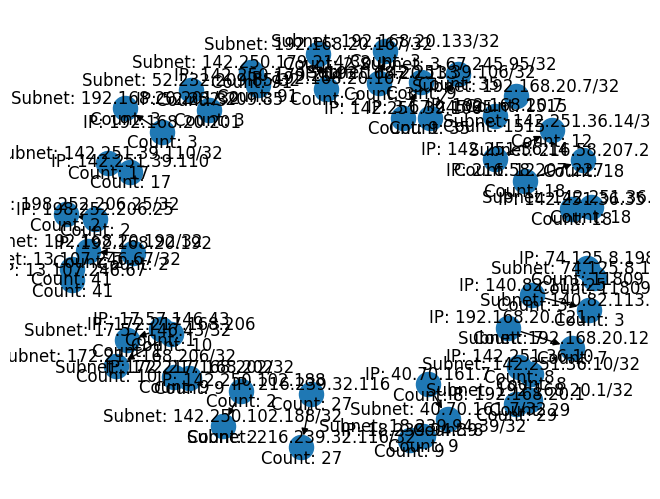

In [5]:
import pyshark
import networkx as nx
import matplotlib.pyplot as plt
import ipaddress
import nest_asyncio
nest_asyncio.apply()

def extract_ip_addresses_and_subnets(pcap_file):
    ip_counter = Counter()
    subnet_counter = Counter()

    # Open the PCAP file for reading
    cap = pyshark.FileCapture(pcap_file)

    # Iterate over each packet in the PCAP file
    for packet in cap:
        # Check if the packet has an IP layer
        if 'IP' in packet:
            # Extract the source IP address
            source_ip = packet.ip.src
            ip_counter[source_ip] += 1

            # Extract the IP subnet
            ip = ipaddress.ip_address(source_ip)
            subnet = ipaddress.ip_network(ip, strict=False)
            subnet_counter[subnet] += 1

    # Close the PCAP file
    cap.close()

    return ip_counter, subnet_counter

def visualize_graph(ip_counter, subnet_counter):
    # Create a directed graph
    G = nx.DiGraph()

    # Add IP addresses as nodes
    for ip, count in ip_counter.items():
        G.add_node(ip, label=f"IP: {ip}\nCount: {count}")

    # Add subnets as nodes
    for subnet, count in subnet_counter.items():
        G.add_node(subnet, label=f"Subnet: {subnet}\nCount: {count}")

    # Add edges between IP addresses and their corresponding subnets
    for ip, subnet in zip(ip_counter.keys(), subnet_counter.keys()):
        G.add_edge(ip, subnet)

    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'))
    plt.show()

if __name__ == "__main__":
    try:
        pcap_file = "/Users/eugenie/thesis/trace.pcap"
        ip_counter, subnet_counter = extract_ip_addresses_and_subnets(pcap_file)
        visualize_graph(ip_counter, subnet_counter)
    except KeyboardInterrupt:
        print("Stopped extracting IP addresses and subnets.")
